<a href="https://colab.research.google.com/github/Abhi23run/Python/blob/main/Python_Utility/bimodal_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Generate samples
samples1 = beta.rvs(a1, b1, size=int(10000 * weight))
samples2 = beta.rvs(a2, b2, size=int(10000 * (1 - weight)))
samples = np.concatenate((samples1, samples2))

In [8]:
len(samples)

10000

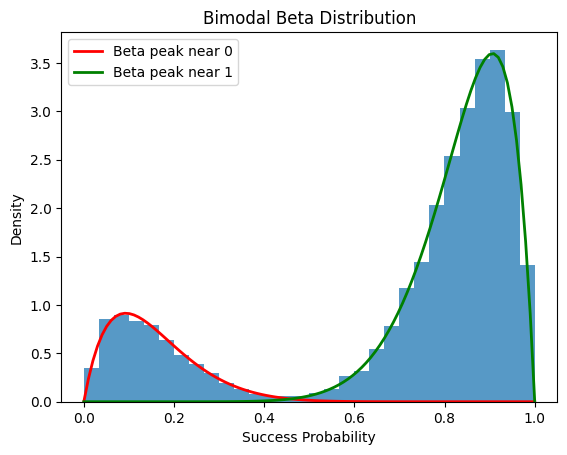

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters for the beta distribution to simulate a bimodal shape
a1, b1 = 2, 10   # Parameters for the peak near 0
a2, b2 = 10, 2   # Parameters for the peak near 1
weight = 0.17     # Weight for mixing the two beta distributions

a1,b1,a2,b2,weight= tuple([ 1.99675903, 10.75595677, 10.65460421 , 1.99675903, 0.20129639])

# Generate samples
samples1 = beta.rvs(a1, b1, size=int(10000 * weight))
samples2 = beta.rvs(a2, b2, size=int(10000 * (1 - weight)))
samples = np.concatenate((samples1, samples2))

# Plot the histogram
plt.hist(samples, bins=30, density=True, alpha=0.75)

# Plot the PDFs of the individual beta distributions for reference
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a1, b1) * weight, 'r-', lw=2, label='Beta peak near 0')
plt.plot(x, beta.pdf(x, a2, b2) * (1 - weight), 'g-', lw=2, label='Beta peak near 1')

plt.xlabel('Success Probability')
plt.ylabel('Density')
plt.title('Bimodal Beta Distribution')
plt.legend()
plt.show()


Means: [0.80006012 0.19732164]
Covariances: [0.00239597 0.0024763 ]


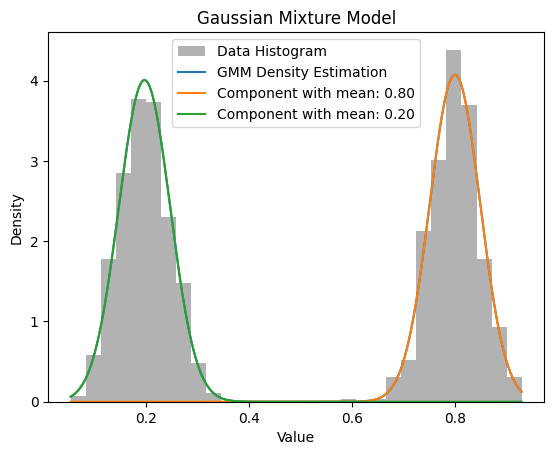

In [10]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

bimodal_data = np.concatenate([np.random.normal(loc=0.2, scale=0.05, size=500),
                               np.random.normal(loc=0.8, scale=0.05, size=500)])

# Create a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, random_state=0)

# Fit the model to the data
gmm.fit(bimodal_data.reshape(-1, 1))

# Print the means and covariances of the two components
print(f'Means: {gmm.means_.ravel()}')
print(f'Covariances: {gmm.covariances_.ravel()}')

# Generate a sequence of points to evaluate the model
x = np.linspace(bimodal_data.min(), bimodal_data.max(), 1000).reshape(-1, 1)

# Predict the label of each sample
labels = gmm.predict(x)

# Plot the original data and the GMM density estimation
plt.hist(bimodal_data, bins=30, density=True, alpha=0.6, color='gray', label='Data Histogram')
plt.plot(x, np.exp(gmm.score_samples(x)), label='GMM Density Estimation')

# Plot each Gaussian component of the GMM
for mean, covar, weight in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    plt.plot(x, weight * norm.pdf(x, mean, np.sqrt(covar)).ravel(), label=f'Component with mean: {mean[0]:.2f}')

plt.title('Gaussian Mixture Model')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

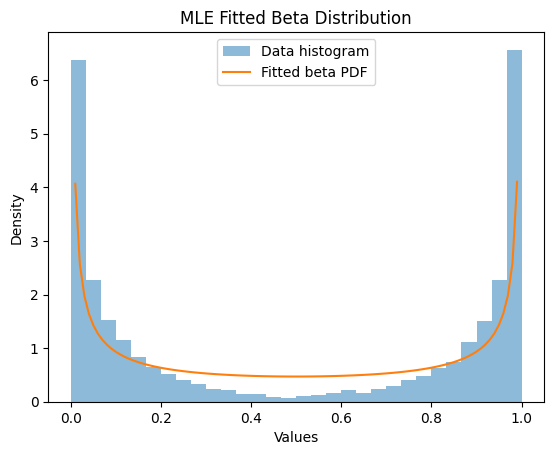

Estimated alpha (a): 0.3291138421199082
Estimated beta (b): 0.32711429641475986


In [11]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Let's assume 'data' is your column of interest which contains values between 0 and 1.
# For this example, I will simulate some data that might resemble your data.
# You would replace this with: data = your_column_data
target_feature = np.concatenate([np.random.beta(a=0.5, b=5, size=5000), np.random.beta(a=5, b=0.5, size=5000)])

# Estimate the parameters of the beta distribution using MLE
a_hat, b_hat, loc_hat, scale_hat = beta.fit(target_feature, floc=0, fscale=1)

# Generate a range of values between 0 and 1 to calculate the fitted PDF
x = np.linspace(0, 1, 100)

# Calculate the fitted PDF using the estimated parameters
fitted_pdf = beta.pdf(x, a_hat, b_hat, loc=loc_hat, scale=scale_hat)

# Plot the histogram of the data
plt.hist(target_feature, bins=30, density=True, alpha=0.5, label='Data histogram')

# Plot the fitted PDF
plt.plot(x, fitted_pdf, label='Fitted beta PDF')

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('MLE Fitted Beta Distribution')
plt.legend()

# Show the plot
plt.show()

# Print the estimated parameters
print(f"Estimated alpha (a): {a_hat}")
print(f"Estimated beta (b): {b_hat}")


In [29]:
import numpy as np
from scipy.stats import beta
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Assuming you have a dataset 'data' with values between 0 and 1
# For the sake of an example, we'll create a synthetic dataset
data = np.concatenate((np.random.beta(0.5, 5, 5000), np.random.beta(5, 0.5, 5000)))

# Define the negative log likelihood for a mixture of two Beta distributions
def neg_log_likelihood(params):
    # Ensure parameters are within bounds
    if min(params) <= 0 or params[4] >= 1 or params[4] <= 0:
        return np.inf

    # Extract parameters
    a1, b1, a2, b2, p = params

    # Calculate the individual likelihoods
    l1 = beta(a1, b1).pdf(data)
    l2 = beta(a2, b2).pdf(data)

    # Combine likelihoods into a mixture
    mixture_likelihood = p * l1 + (1 - p) * l2

    # Avoid division by zero
    mixture_likelihood[mixture_likelihood == 0] = 1e-20

    # Calculate the negative log likelihood
    return -np.sum(np.log(mixture_likelihood))

# Set initial parameters (a1, b1, a2, b2, p) and bounds
initial_params = [2, 50, 50, 2, 0.2]
bounds = [(0, None), (0, None), (0, None), (0, None), (0, 1)]

# Minimize the negative log likelihood function
result = minimize(neg_log_likelihood, initial_params, bounds=bounds, method='L-BFGS-B')

# Check if the minimization was successful
if result.success:
    fitted_params = result.x
    print(f"Success: {result.success}, Params: {fitted_params}")
else:
    raise ValueError(result.message)


Success: True, Params: [ 1.85870067 46.46751684 46.46751684  1.85870067  0.25651973]


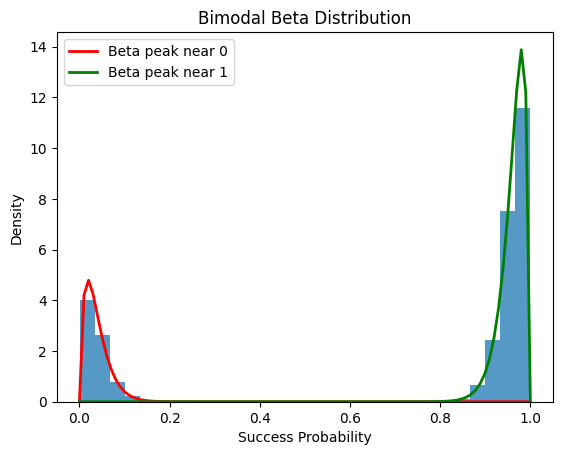

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters for the beta distribution to simulate a bimodal shape
# a1,b1 Parameters for the peak near 0
# a2,b2 Parameters for the peak near 1
 # Weight for mixing the two beta distributions

a1,b1,a2,b2,weight= tuple(fitted_params)

# Generate samples
samples1 = beta.rvs(a1, b1, size=int(10000 * weight))
samples2 = beta.rvs(a2, b2, size=int(10000 * (1 - weight)))
samples = np.concatenate((samples1, samples2))

# Plot the histogram
plt.hist(samples, bins=30, density=True, alpha=0.75)

# Plot the PDFs of the individual beta distributions for reference
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a1, b1) * weight, 'r-', lw=2, label='Beta peak near 0')
plt.plot(x, beta.pdf(x, a2, b2) * (1 - weight), 'g-', lw=2, label='Beta peak near 1')

plt.xlabel('Success Probability')
plt.ylabel('Density')
plt.title('Bimodal Beta Distribution')
plt.legend()
plt.show()


In [38]:
import pandas as pd

data = {'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']}
df = pd.DataFrame(data)

# Convert the 'Color' column into numeric codes
pd.concat([df,pd.get_dummies(df['Color'])])


,Color,Blue,Green,Red
0,Red,NaN,NaN,NaN
1,Green,NaN,NaN,NaN
2,Blue,NaN,NaN,NaN
3,Red,NaN,NaN,NaN
4,Green,NaN,NaN,NaN
0,NaN,0.0,0.0,1.0
1,NaN,0.0,1.0,0.0
2,NaN,1.0,0.0,0.0
3,NaN,0.0,0.0,1.0
4,NaN,0.0,1.0,0.0


In [39]:
df

,Color
0,Red
1,Green
2,Blue
3,Red
4,Green
